<a href="https://colab.research.google.com/github/hrishigadkari/Deep-Learning/blob/master/Stock-Prediction-with-RNN-LSTM-GRU/Stocks_RNN_using_LSTM_and_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory

### Recurrent Neural Networks
Recurrent Neural Network is a generalization of feedforward neural network that has an internal memory. RNN is recurrent in nature as it performs the same function for every input of data while the output of the current input depends on the past one computation. After producing the output, it is copied and sent back into the recurrent network. For making a decision, it considers the current input and the output that it has learned from the previous input.

Unlike feedforward neural networks, RNNs can use their internal state (memory) to process sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition. In other neural networks, all the inputs are independent of each other. But in RNN, all the inputs are related to each other.
![alt text](https://miro.medium.com/max/627/1*go8PHsPNbbV6qRiwpUQ5BQ.png)



### LSTM (Long Short Term Memory) and GRU (Gated recurrent unit)

Both LSTM (Long short term memory) and GRU (Gate Recurrent Unit) have the goal of keeping long-term dependencies effectively while handling the vanishing/exploding gradient problems (when your gradient becomes too big or simply disappear, killing your learning process).

LSTMs do so via input, forget, and output gates (as you can see in the screenshot below); the input gate regulates how much of the new cell state to keep, the forget gate regulates how much of the existing memory to forget, and the output gate regulates how much of the cell state should be exposed to the next layers of the network.

GRUs operates using a reset gate and an update gate. The reset gate sits between the previous activation and the next candidate activation to forget the previous state, and the update gate decides how much of the candidate activation to use in updating the cell state.

GRUs are over LSTM as it is easy to modify and doesn't need memory units, therefore, faster to train than LSTM and give as per performance. Actually, the key difference comes out to be more than that: Long-short term (LSTM) perceptrons are made up using the momentum and gradient descent algorithms.

[Source](https://www.quora.com/Whats-the-difference-between-LSTM-and-GRU#:~:text=as%20input%20gates.-,GRU%20use%20less%20training%20parameters%20and%20therefore%20use%20less%20memory,faster%20operation%20go%20for%20GRU.)

![alt text](https://lh3.googleusercontent.com/proxy/bbaLU-fCT2TrX7wgAw-81uio1McIWQavqp-ITMnQNUc8OojSo-LCTlU-XXoYKqebwCKMFyWdns4C7h03kNql9fAENQI9mb9qa65VXQsqy8WvF83zovEjDYbM9qgWDdqz)

# Code

## EDA

In [ ]:
#This section imports all the relevant libraries that are required to run this script
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [ ]:
# For plotting the graphs we would be creating the functions
def plot_predictions(test,predicted):
    plt.plot(test, color='red')
    plt.plot(predicted, color='blue')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
# Understanding the data and printing them
from IPython.display import display,HTML

datasetAAPL = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])


datasetAMZN = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])


datasetGOOGL = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])


datasetMSFT = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])


print("Apple".title())
display(datasetAAPL.head(10))

Apple


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
2006-01-10,10.89,11.70,10.83,11.55,570088246,AAPL
2006-01-11,11.98,12.11,11.80,11.99,373548882,AAPL
2006-01-12,12.14,12.34,11.95,12.04,320201966,AAPL
2006-01-13,12.14,12.29,12.09,12.23,194153393,AAPL


In [ ]:
#printing the Amazon Stock dataset
print("Amazon".title())
display(datasetAMZN.head(10))


Amazon


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN
2006-01-10,46.41,46.75,45.36,45.65,9686957,AMZN
2006-01-11,45.65,45.70,44.26,44.93,8497383,AMZN
2006-01-12,44.79,45.09,44.09,44.36,5818301,AMZN
2006-01-13,44.48,44.85,44.00,44.40,4432237,AMZN


In [ ]:
#printing the Google Stock dataset
print("Google".title())
display(datasetGOOGL.head(10))


Google


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
2006-01-10,232.44,235.36,231.25,235.11,9104719,GOOGL
2006-01-11,235.87,237.79,234.82,236.05,9008664,GOOGL
2006-01-12,237.10,237.73,230.98,232.05,10125212,GOOGL
2006-01-13,232.39,233.68,231.04,233.36,7660220,GOOGL


In [ ]:
#printing the Microsoft Stock dataset
print("Microsoft".title())
display(datasetMSFT.head(10))

Microsoft


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT
2006-01-10,26.65,27.02,26.59,27.00,64924946,MSFT
2006-01-11,27.01,27.39,26.90,27.29,70123544,MSFT
2006-01-12,27.25,27.26,26.97,27.14,45994725,MSFT
2006-01-13,27.03,27.25,27.01,27.19,41449046,MSFT


In [ ]:
# Checking for missing values (if any) within the dataset
training_setAAPL = datasetAAPL[:'2016'].iloc[:,1:2].values
test_setAAPL = datasetAAPL['2017':].iloc[:,1:2].values

training_setAMZN = datasetAMZN[:'2016'].iloc[:,1:2].values
test_setAMZN = datasetAMZN['2017':].iloc[:,1:2].values

training_setGOOGL = datasetGOOGL[:'2016'].iloc[:,1:2].values
test_setGOOGL = datasetGOOGL['2017':].iloc[:,1:2].values

training_setMSFT = datasetMSFT[:'2016'].iloc[:,1:2].values
test_setMSFT = datasetMSFT['2017':].iloc[:,1:2].values

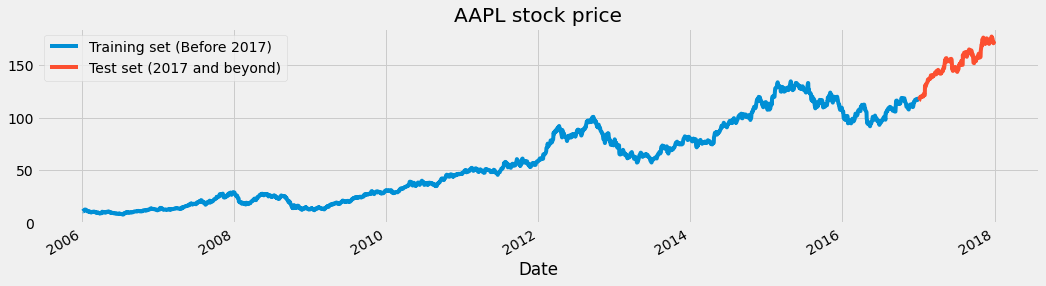

In [ ]:
# We have chosen 'High' attribute for prices.
datasetAAPL["High"][:'2016'].plot(figsize=(16,4),legend=True)
datasetAAPL["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('AAPL stock price')
plt.show()


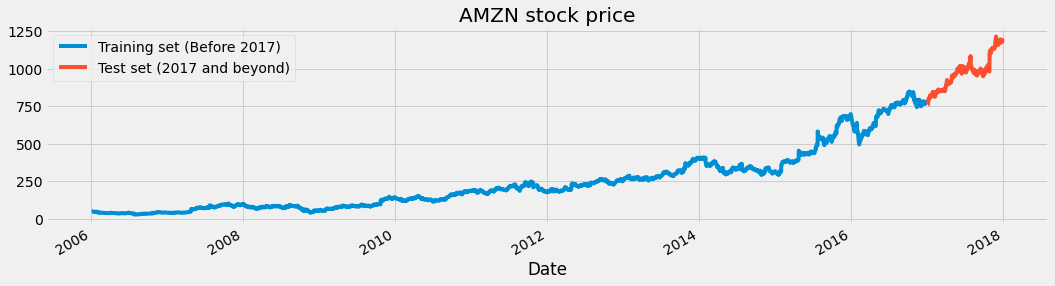

In [ ]:
# Same for Amazon
datasetAMZN["High"][:'2016'].plot(figsize=(16,4),legend=True)
datasetAMZN["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('AMZN stock price')
plt.show()

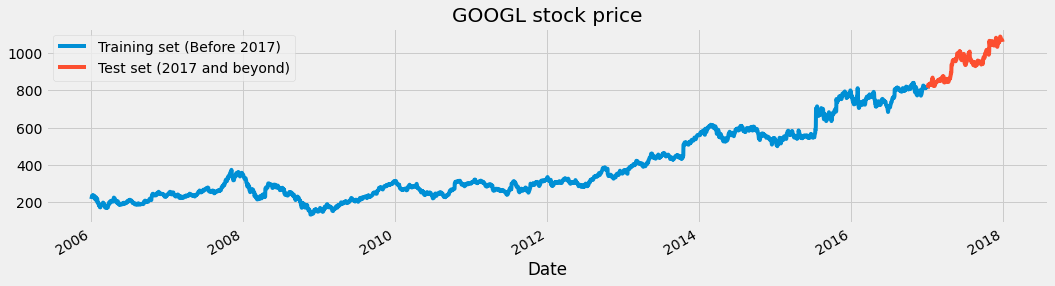

In [ ]:
#And for Google
datasetGOOGL["High"][:'2016'].plot(figsize=(16,4),legend=True)
datasetGOOGL["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('GOOGL stock price')
plt.show()

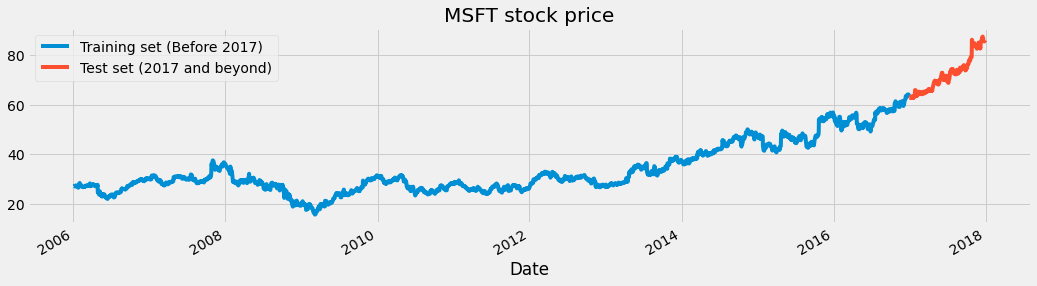

In [ ]:
#And for Microsoft
datasetMSFT["High"][:'2016'].plot(figsize=(16,4),legend=True)
datasetMSFT["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('MSFT stock price')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaledAAPL = sc.fit_transform(training_setAAPL)
training_set_scaledGOOGL = sc.fit_transform(training_setGOOGL)
training_set_scaledMSFT = sc.fit_transform(training_setMSFT)
training_set_scaledAMZN = sc.fit_transform(training_setAMZN)


In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
# 
X_trainAAPL,X_trainAMZN, X_trainGOOGL, X_trainMSFT = [], [], [], []
y_trainAAPL, y_trainAMZN, y_trainGOOGL, y_trainMSFT = [],[],[],[]
for i in range(60,2768):
    X_trainAAPL.append(training_set_scaledAAPL[i-60:i,0])
    y_trainAAPL.append(training_set_scaledAAPL[i,0])
X_trainAAPL, y_trainAAPL = np.array(X_trainAAPL), np.array(y_trainAAPL)

for i in range(60,2768):
    X_trainAMZN.append(training_set_scaledAMZN[i-60:i,0])
    y_trainAMZN.append(training_set_scaledAMZN[i,0])
X_trainAMZN, y_trainAMZN = np.array(X_trainAMZN), np.array(y_trainAMZN)


for i in range(60,2768):
    X_trainGOOGL.append(training_set_scaledGOOGL[i-60:i,0])
    y_trainGOOGL.append(training_set_scaledGOOGL[i,0])
X_trainGOOGL, y_trainGOOGL = np.array(X_trainGOOGL), np.array(y_trainGOOGL)


for i in range(60,2768):
    X_trainMSFT.append(training_set_scaledMSFT[i-60:i,0])
    y_trainMSFT.append(training_set_scaledMSFT[i,0])
X_trainMSFT, y_trainMSFT = np.array(X_trainMSFT), np.array(y_trainMSFT)



In [ ]:
# Reshaping X_train for efficient modelling, for all the stock prices
X_trainAAPL = np.reshape(X_trainAAPL, (X_trainAAPL.shape[0],X_trainAAPL.shape[1],1))
X_trainAMZN = np.reshape(X_trainAMZN, (X_trainAMZN.shape[0],X_trainAMZN.shape[1],1))
X_trainGOOGL = np.reshape(X_trainGOOGL, (X_trainGOOGL.shape[0],X_trainGOOGL.shape[1],1))
X_trainMSFT = np.reshape(X_trainMSFT, (X_trainMSFT.shape[0],X_trainMSFT.shape[1],1))

In [ ]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_trainAAPL.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_trainAAPL,y_trainAAPL,epochs=50,batch_size=32)

Epoch 1/50
2708/2708 [==============================] - 13s 5ms/step - loss: 0.0168
Epoch 2/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0069
Epoch 3/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0060
Epoch 4/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0045
Epoch 5/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0045
Epoch 6/50
2708/2708 [==============================] - 12s 4ms/step - loss: 0.0040
Epoch 7/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0039
Epoch 8/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0033
Epoch 9/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0031
Epoch 10/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0030
Epoch 11/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0028
Epoch 12/50
2708/2708 [==============================] - 11s 4ms/step - lo

In [ ]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_trainAMZN.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_trainAMZN,y_trainAMZN,epochs=50,batch_size=32)

Epoch 1/50
2708/2708 [==============================] - 13s 5ms/step - loss: 0.0105
Epoch 2/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0048
Epoch 3/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0037
Epoch 4/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0029
Epoch 5/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0025
Epoch 6/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0025
Epoch 7/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0023
Epoch 8/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0020
Epoch 9/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0019
Epoch 10/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0020
Epoch 11/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0016
Epoch 12/50
2708/2708 [==============================] - 11s 4ms/step - lo

In [ ]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_trainGOOGL.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_trainGOOGL,y_trainGOOGL,epochs=50,batch_size=32)

Epoch 1/50
2708/2708 [==============================] - 12s 5ms/step - loss: 0.0144
Epoch 2/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0062
Epoch 3/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0054
Epoch 4/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0043
Epoch 5/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0036
Epoch 6/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0033
Epoch 7/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0029
Epoch 8/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0030
Epoch 9/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0028
Epoch 10/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0026
Epoch 11/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0022
Epoch 12/50
2708/2708 [==============================] - 11s 4ms/step - lo

In [ ]:
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_trainMSFT.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_trainMSFT,y_trainMSFT,epochs=50,batch_size=32)

Epoch 1/50
2708/2708 [==============================] - 12s 5ms/step - loss: 0.0201
Epoch 2/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0079
Epoch 3/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0059
Epoch 4/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0044
Epoch 5/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0040
Epoch 6/50
2708/2708 [==============================] - 12s 4ms/step - loss: 0.0034
Epoch 7/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0033
Epoch 8/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0026
Epoch 9/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0024
Epoch 10/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0023
Epoch 11/50
2708/2708 [==============================] - 11s 4ms/step - loss: 0.0022
Epoch 12/50
2708/2708 [==============================] - 11s 4ms/step - lo

In [ ]:
#Reshaping and Transforming the inputs for AAPL
dataset_totalAAPL = pd.concat((datasetAAPL["High"][:'2016'],datasetAAPL["High"]['2017':]),axis=0)
inputsAAPL = dataset_totalAAPL[len(dataset_totalAAPL)-len(test_setAAPL) - 60:].values
inputsAAPL = inputsAAPL.reshape(-1,1)
inputsAAPL  = sc.transform(inputsAAPL)

In [ ]:
#Reshaping and Transforming the inputs for AMZN
dataset_totalAMZN = pd.concat((datasetAMZN["High"][:'2016'],datasetAMZN["High"]['2017':]),axis=0)
inputsAMZN = dataset_totalAMZN[len(dataset_totalAMZN)-len(test_setAMZN) - 60:].values
inputsAMZN = inputsAMZN.reshape(-1,1)
inputsAMZN  = sc.transform(inputsAMZN)

In [ ]:
#Reshaping and Transforming the inputs for GOOGL
dataset_totalGOOGL = pd.concat((datasetGOOGL["High"][:'2016'],datasetGOOGL["High"]['2017':]),axis=0)
inputsGOOGL = dataset_totalGOOGL[len(dataset_totalGOOGL)-len(test_setGOOGL) - 60:].values
inputsGOOGL = inputsGOOGL.reshape(-1,1)
inputsGOOGL  = sc.transform(inputsGOOGL)

In [ ]:
#Reshaping and Transforming the inputs for MSFT
dataset_totalMSFT = pd.concat((datasetMSFT["High"][:'2016'],datasetMSFT["High"]['2017':]),axis=0)
inputsMSFT = dataset_totalMSFT[len(dataset_totalMSFT)-len(test_setMSFT) - 60:].values
inputsMSFT = inputsMSFT.reshape(-1,1)
inputsMSFT  = sc.transform(inputsMSFT)

In [ ]:
# Preparing X_test and predicting the prices
X_testAAPL = []
for i in range(60,311):
    X_testAAPL.append(inputsAAPL[i-60:i,0])
X_testAAPL = np.array(X_testAAPL)
X_testAAPL = np.reshape(X_testAAPL, (X_testAAPL.shape[0],X_testAAPL.shape[1],1))
predicted_stock_priceAAPL = regressor.predict(X_testAAPL)
predicted_stock_priceAAPL = sc.inverse_transform(predicted_stock_priceAAPL)


In [ ]:
# Preparing X_test and predicting the prices
X_testAMZN = []
for i in range(60,311):
    X_testAMZN.append(inputsAMZN[i-60:i,0])
X_testAMZN = np.array(X_testAMZN)
X_testAMZN = np.reshape(X_testAMZN, (X_testAMZN.shape[0],X_testAMZN.shape[1],1))
predicted_stock_priceAMZN = regressor.predict(X_testAMZN)
predicted_stock_priceAMZN = sc.inverse_transform(predicted_stock_priceAMZN)



In [ ]:
# Preparing X_test and predicting the prices
X_testGOOGL = []
for i in range(60,311):
    X_testGOOGL.append(inputsGOOGL[i-60:i,0])
X_testGOOGL = np.array(X_testGOOGL)
X_testGOOGL = np.reshape(X_testGOOGL, (X_testGOOGL.shape[0],X_testGOOGL.shape[1],1))
predicted_stock_priceGOOGL = regressor.predict(X_testGOOGL)
predicted_stock_priceGOOGL = sc.inverse_transform(predicted_stock_priceGOOGL)


In [ ]:
# Preparing X_test and predicting the prices
X_testMSFT = []
for i in range(60,311):
    X_testMSFT.append(inputsMSFT[i-60:i,0])
X_testMSFT = np.array(X_testMSFT)
X_testMSFT = np.reshape(X_testMSFT, (X_testMSFT.shape[0],X_testMSFT.shape[1],1))
predicted_stock_priceMSFT = regressor.predict(X_testMSFT)
predicted_stock_priceMSFT = sc.inverse_transform(predicted_stock_priceMSFT)


No handles with labels found to put in legend.


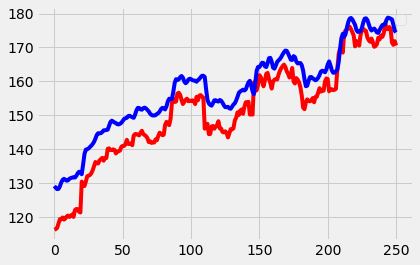

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_setAAPL,predicted_stock_priceAAPL)

No handles with labels found to put in legend.


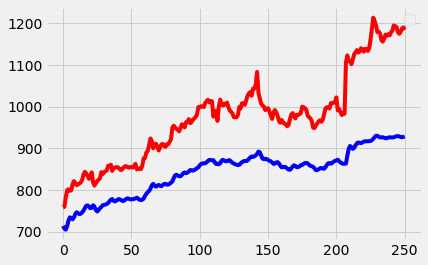

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_setAMZN,predicted_stock_priceAMZN)

No handles with labels found to put in legend.


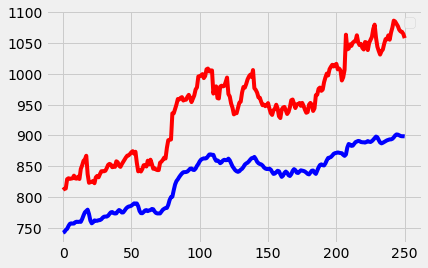

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_setGOOGL,predicted_stock_priceGOOGL)

No handles with labels found to put in legend.


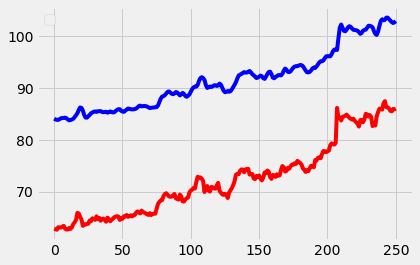

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_setMSFT,predicted_stock_priceMSFT)

In [ ]:
#root mean squared error
return_rmse(test_setAAPL,predicted_stock_priceAAPL)

The root mean squared error is 6.7568122939799595.


In [ ]:
#root mean squared error
return_rmse(test_setAMZN,predicted_stock_priceAMZN)

The root mean squared error is 143.35212321650084.


In [ ]:
#root mean squared error
return_rmse(test_setGOOGL,predicted_stock_priceGOOGL)

The root mean squared error is 117.69596920427412.


In [ ]:
#root mean squared error
return_rmse(test_setMSFT,predicted_stock_priceMSFT)

The root mean squared error is 19.31608438166749.


In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_trainAAPL.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_trainAAPL.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_trainAAPL.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_trainAAPL,y_trainAAPL,epochs=50,batch_size=150)

Epoch 1/50
2708/2708 [==============================] - 7s 3ms/step - loss: 0.1131
Epoch 2/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0310
Epoch 3/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0046
Epoch 4/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0034
Epoch 5/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0033
Epoch 6/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0029
Epoch 7/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0028
Epoch 8/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0027
Epoch 9/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0028
Epoch 10/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0025
Epoch 11/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0023
Epoch 12/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0024
E

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_trainAMZN.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_trainAMZN.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_trainAMZN.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_trainAMZN,y_trainAMZN,epochs=50,batch_size=150)

Epoch 1/50
2708/2708 [==============================] - 7s 3ms/step - loss: 0.0644
Epoch 2/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0327
Epoch 3/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0095
Epoch 4/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0030
Epoch 5/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0023
Epoch 6/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0021
Epoch 7/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0021
Epoch 8/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0019
Epoch 9/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0020
Epoch 10/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0019
Epoch 11/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0018
Epoch 12/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0018
E

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_trainGOOGL.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_trainGOOGL.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_trainGOOGL.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_trainGOOGL,y_trainGOOGL,epochs=50,batch_size=150)

Epoch 1/50
2708/2708 [==============================] - 7s 3ms/step - loss: 0.0919
Epoch 2/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0433
Epoch 3/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0127
Epoch 4/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0042
Epoch 5/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0036
Epoch 6/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0030
Epoch 7/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0032
Epoch 8/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0027
Epoch 9/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0028
Epoch 10/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0025
Epoch 11/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0024
Epoch 12/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0025
E

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_trainMSFT.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_trainMSFT.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_trainMSFT.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_trainMSFT,y_trainMSFT,epochs=50,batch_size=150)

Epoch 1/50
2708/2708 [==============================] - 8s 3ms/step - loss: 0.0749
Epoch 2/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0288
Epoch 3/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0132
Epoch 4/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0043
Epoch 5/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0029
Epoch 6/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0026
Epoch 7/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0025
Epoch 8/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0022
Epoch 9/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0021
Epoch 10/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0020
Epoch 11/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0021
Epoch 12/50
2708/2708 [==============================] - 6s 2ms/step - loss: 0.0019
E

In [ ]:
# Preparing X_test and predicting the prices
X_testAAPL = []
for i in range(60,311):
    X_testAAPL.append(inputsAAPL[i-60:i,0])
X_testAAPL = np.array(X_testAAPL)
X_testAAPL = np.reshape(X_testAAPL, (X_testAAPL.shape[0],X_testAAPL.shape[1],1))
GRU_predicted_stock_priceAAPL = regressorGRU.predict(X_testAAPL)
GRU_predicted_stock_priceAAPL = sc.inverse_transform(GRU_predicted_stock_priceAAPL)

# Preparing X_test and predicting the prices
X_testAMZN = []
for i in range(60,311):
    X_testAMZN.append(inputsAMZN[i-60:i,0])
X_testAMZN = np.array(X_testAMZN)
X_testAMZN = np.reshape(X_testAMZN, (X_testAMZN.shape[0],X_testAMZN.shape[1],1))
GRU_predicted_stock_priceAMZN = regressorGRU.predict(X_testAMZN)
GRU_predicted_stock_priceAMZN = sc.inverse_transform(GRU_predicted_stock_priceAMZN)

# Preparing X_test and predicting the prices
X_testGOOGL = []
for i in range(60,311):
    X_testGOOGL.append(inputsGOOGL[i-60:i,0])
X_testGOOGL = np.array(X_testGOOGL)
X_testGOOGL = np.reshape(X_testGOOGL, (X_testGOOGL.shape[0],X_testGOOGL.shape[1],1))
GRU_predicted_stock_priceGOOGL = regressorGRU.predict(X_testGOOGL)
GRU_predicted_stock_priceGOOGL = sc.inverse_transform(GRU_predicted_stock_priceGOOGL)

# Preparing X_test and predicting the prices
X_testMSFT = []
for i in range(60,311):
    X_testMSFT.append(inputsMSFT[i-60:i,0])
X_testMSFT = np.array(X_testMSFT)
X_testMSFT = np.reshape(X_testMSFT, (X_testMSFT.shape[0],X_testMSFT.shape[1],1))
GRU_predicted_stock_priceMSFT = regressorGRU.predict(X_testMSFT)
GRU_predicted_stock_priceMSFT = sc.inverse_transform(GRU_predicted_stock_priceMSFT)

No handles with labels found to put in legend.


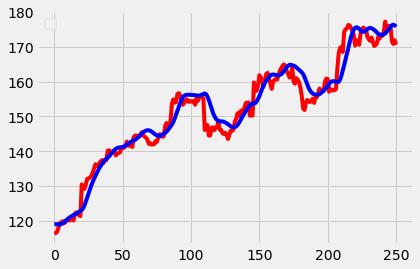

In [ ]:
# Visualizing the results for GRU
plot_predictions(test_setAAPL,GRU_predicted_stock_priceAAPL)

No handles with labels found to put in legend.


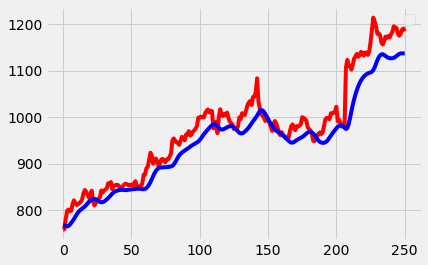

In [ ]:
# Visualizing the results for GRU
plot_predictions(test_setAMZN,GRU_predicted_stock_priceAMZN)

No handles with labels found to put in legend.


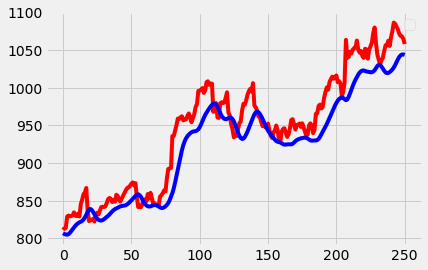

In [ ]:
# Visualizing the results for GRU
plot_predictions(test_setGOOGL,GRU_predicted_stock_priceGOOGL)

No handles with labels found to put in legend.


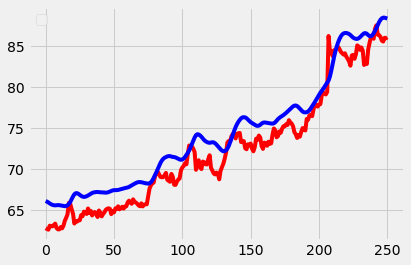

In [ ]:
# Visualizing the results for GRU
plot_predictions(test_setMSFT,GRU_predicted_stock_priceMSFT)

In [ ]:
#rmse FOR apple
return_rmse(test_setAAPL,GRU_predicted_stock_priceAAPL)

The root mean squared error is 3.348825028479449.


In [ ]:
#rmse FOR amazon
return_rmse(test_setAMZN,GRU_predicted_stock_priceAMZN)

The root mean squared error is 38.761336479425005.


In [ ]:
#rmse FOR google
return_rmse(test_setGOOGL,GRU_predicted_stock_priceGOOGL)

The root mean squared error is 29.205882140439353.


In [ ]:
#rmse FOR microsoft
return_rmse(test_setMSFT,GRU_predicted_stock_priceMSFT)

The root mean squared error is 2.2909615407427184.


# Conclusion

We can clearly see that GRU works better than LSTM because the root mean square error of GRU is far lower than LSTM in all of the 4 cases of the Companies.

Even the predicton of the GRU gives much clarity of how stock prices would be predicted compared to the LSTM.

Although stock prices could not be predicted, this is a good excercise to practice to understand the fundamentals of LSTM and GRU.